<a href="https://colab.research.google.com/github/leman-cap13/DL_projects/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
(X_full, y_full), (X_test, y_test)= tf.keras.datasets.cifar10.load_data()
y_full

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X_full,y_full,test_size=0.2)

In [ ]:
X_train, X_test, X_valid = X_train / 255., X_test / 255., X_valid / 255.

In [ ]:
X_train.shape

(40000, 32, 32, 3)

In [ ]:
def plot_image(image):
  plt.imshow(image, interpolation = 'nearest')
  plt.axis('off')

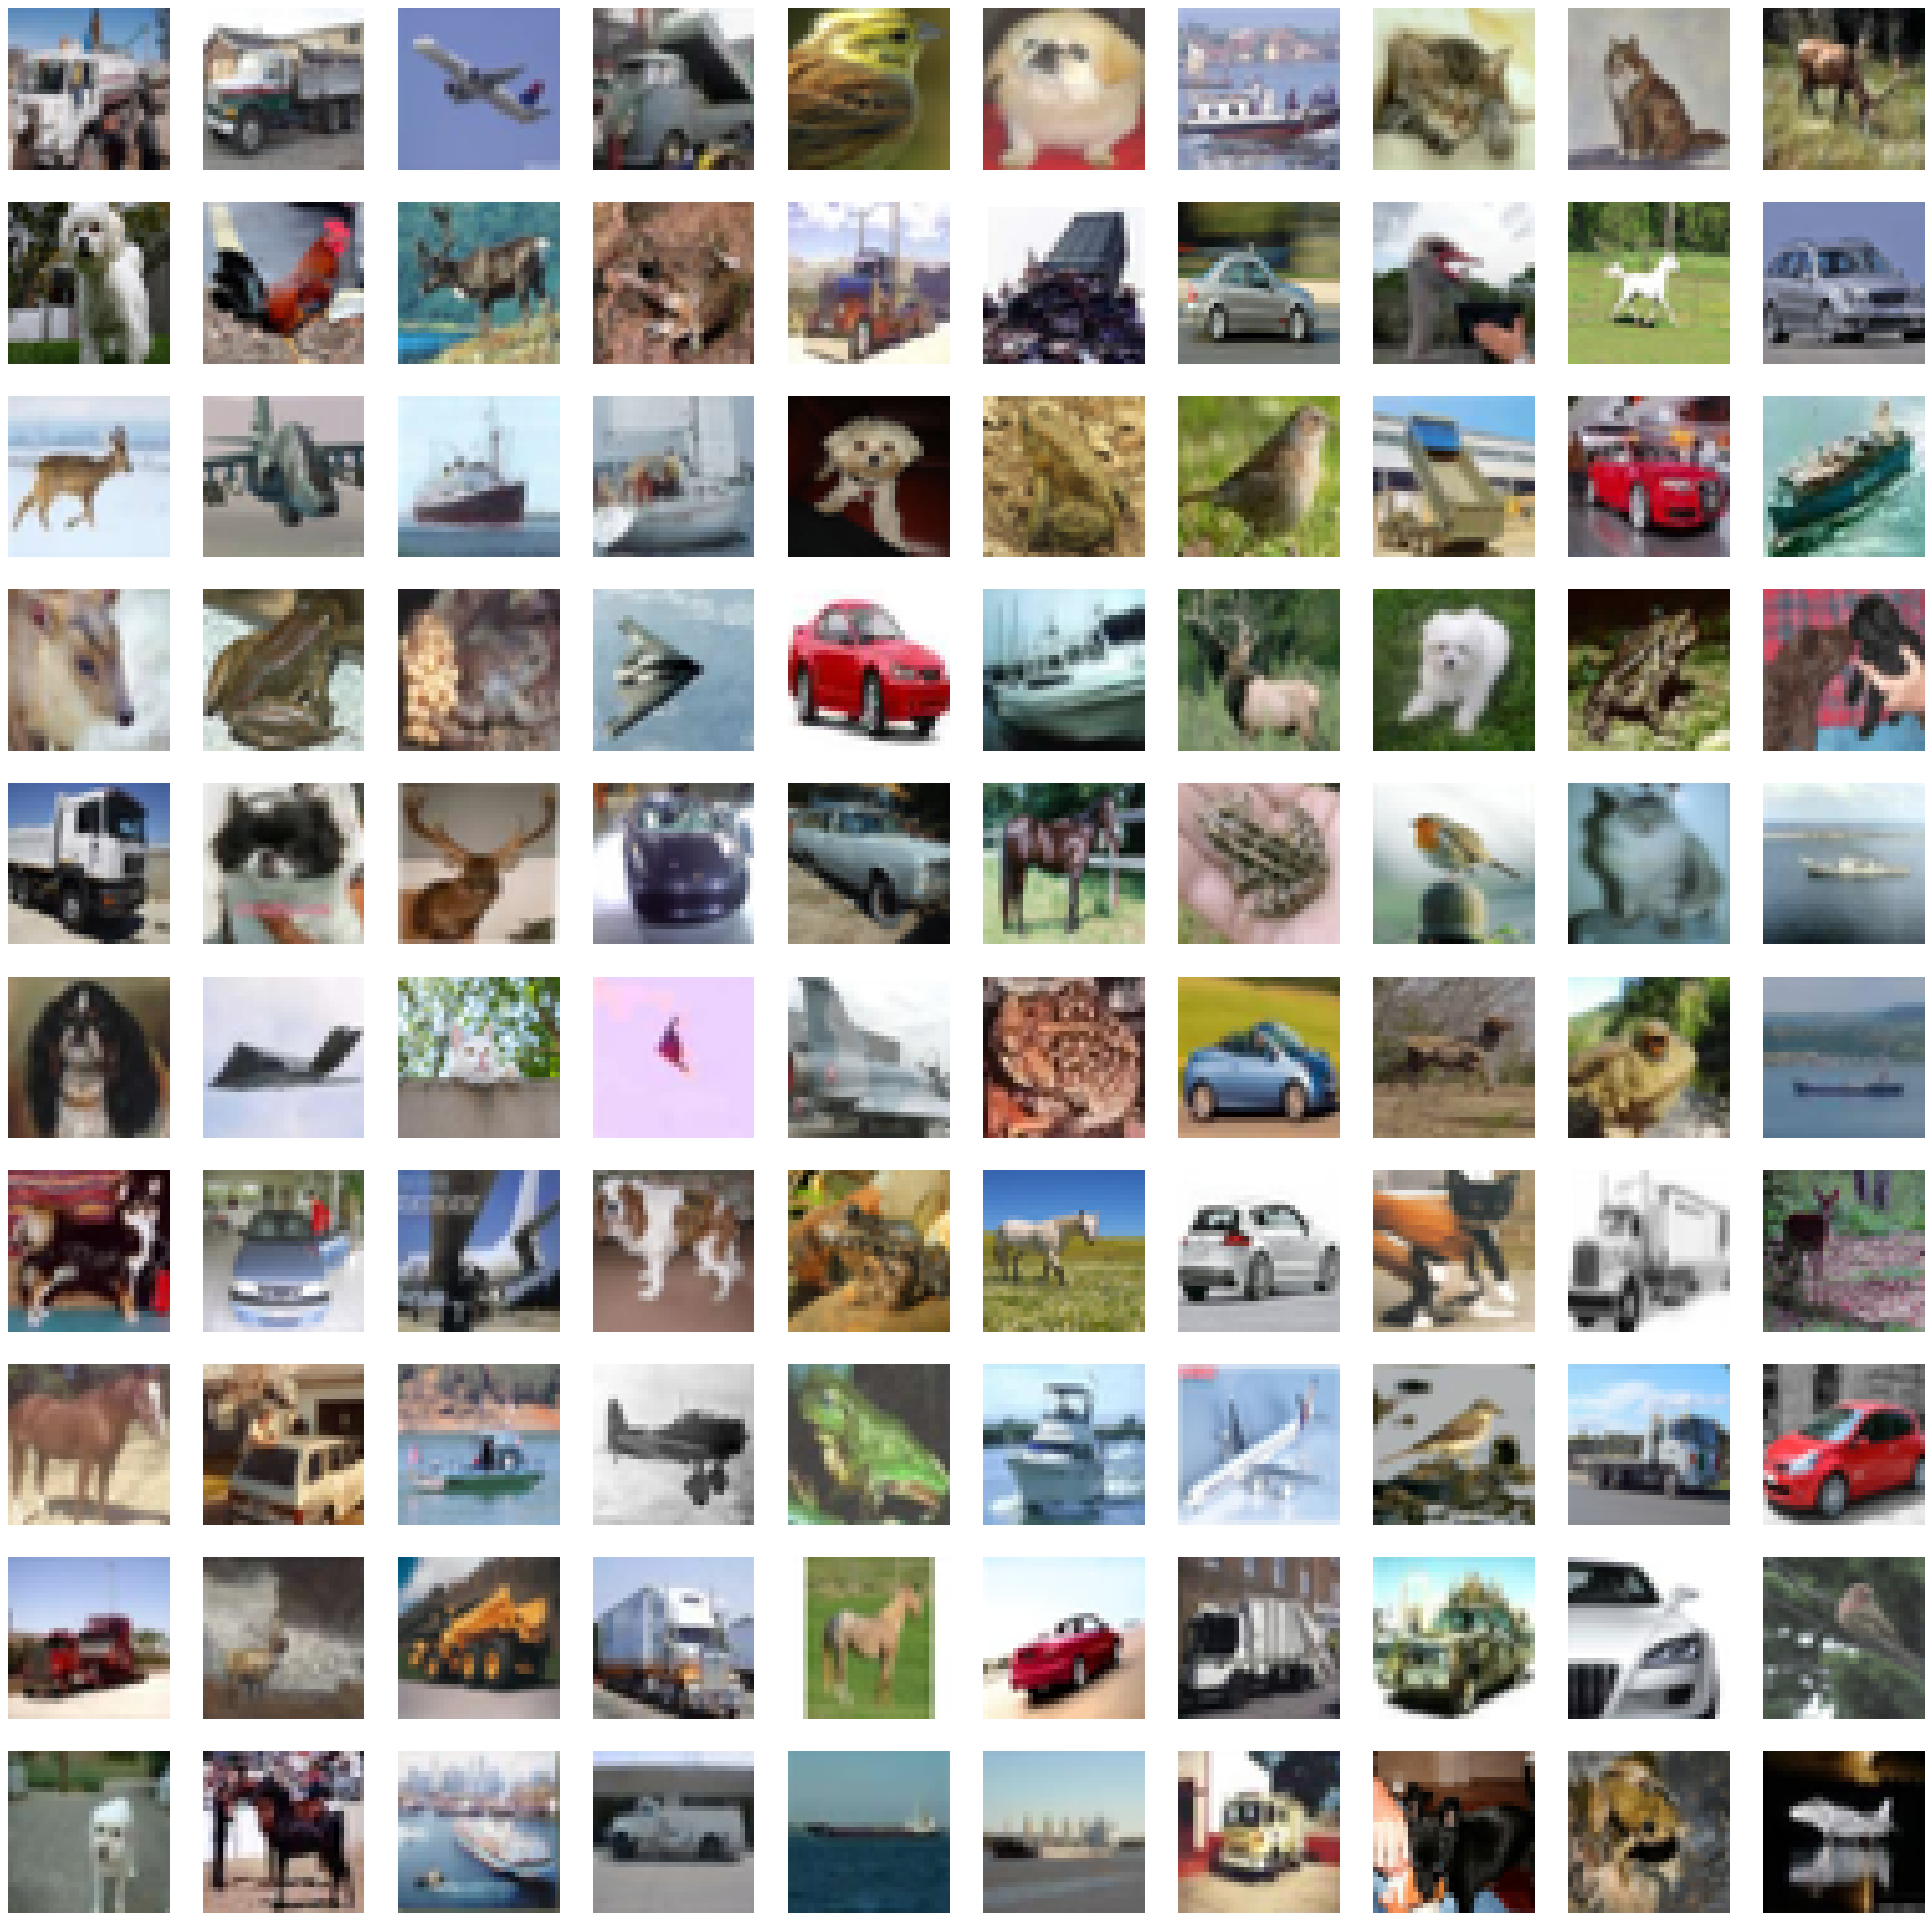

In [ ]:
plt.figure(figsize = (30, 30))
for i, image in enumerate(X_train[:100]):
  plt.subplot(10, 10, i + 1)
  plot_image(image)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='swish', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(300, activation='swish', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='swish', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])



In [ ]:
optimizer=tf.keras.optimizers.Nadam(learning_rate = 1e-3)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 53ms/step - accuracy: 0.1446 - loss: 2.5586 - val_accuracy: 0.2672 - val_loss: 1.9620
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 38ms/step - accuracy: 0.2660 - loss: 2.0087 - val_accuracy: 0.3069 - val_loss: 1.8576
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 33ms/step - accuracy: 0.2926 - loss: 1.9395 - val_accuracy: 0.2903 - val_loss: 1.9014
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.3072 - loss: 1.9040 - val_accuracy: 0.3523 - val_loss: 1.7887
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.3198 - loss: 1.8762 - val_accuracy: 0.3439 - val_loss: 1.7894
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.3296 - loss: 1.8513 - val_accuracy: 0.3651 - val_loss: 1.7494
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.3364 - loss: 1.8284 - val_accuracy: 0.3763 - val_loss: 1.7318
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.3552 -

In [ ]:
X_train.shape

(40000, 32, 32, 3)

In [ ]:
from functools import partial
Conv2D=partial(
    tf.keras.layers.Conv2D,
    kernel_size=7,
    filters=64,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[32, 32, 3]),
    Conv2D(),
    tf.keras.layers.MaxPool2D(),
    Conv2D(filters=128),
    Conv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    Conv2D(filters=256),
    Conv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10,activation='softmax')

])

In [ ]:
class MonteCarlo(tf.keras.layers.Dropout):
  def call(self,inputs,training=True):
    return super().call(inputs,training=True)
Dropout=tf.keras.layers.Dropout
mc_model=tf.keras.Sequential([
    MonteCarlo(layer.rate) if isinstance(layer,Dropout) else layer for layer in model.layers
])
mc_model.set_weights(model.get_weights())
mc_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ monte_carlo (MonteCarlo)             │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ monte_carlo_1 (MonteCarlo)           │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,564,682 (25.04 MB)

 Trainable params: 6,564,682 (25.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mc_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-3),
#               metrics=['accuracy'])

In [ ]:
mc_model.fit(X_train,y_train, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
   4/1250 ━━━━━━━━━━━━━━━━━━━━ 52:44 3s/step - accuracy: 0.1348 - loss: 5.0785

KeyboardInterrupt: 